<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/Exercise_15_Muklis_Pramaditya_Ardian_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering Algorithm

## Studi Kasus

Data yang anda miliki adalah data penjualan setelah terjadinya pandemi Covid-19 dengan kategori produk sports & apparel. Dikarenakan saat ini penjualan banyak dilakukan secara online, anda berencana untuk memperbaiki tampilan website dengan cara mengelompokkan produk berdasarkan kategori-kategori tertentu. Perombakan ini diharapkan dapat mempermudah pembeli dalam memilih barang sesuai dengan selera dan kebutuhan mereka. Untuk mencapai tujuan tersebut anda akan menggunakan history penjualan sebelumnya. Data yang anda miliki adalah sebagai berikut :

- Product Name : Nama produk 
- Product ID : Id unik produk
- Listing Price : Harga sebenarnya dari produk
- Sale Price : Harga saat produk dibeli
- Discount : Diskon yang diberikan dalam suatu produk
- Brand : Nama Brand dari produk
- Description : Deskripsi produk
- Rating : Rating yang diberikan user
- Reviews : Jumlah review suatu produk
- Last Visited : Record terakhir produk dikunjungi oleh customer

Selain mengelompokkan produk, anda juga ingin menganalisis persaingan yang terjadi pada tiap-tiap brand. Dengan mengetahui minat pembeli, harapannya untuk kedepannya anda dapat menyesuaikan store anda dengan kebutuhan pasar.

## Import Libraries and Data

In [1]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Membuat path untuk mengidentifikasi letak directory
path = '/content/gdrive/MyDrive/SIB/6. Supervised Machine Learning - Clustering/6.1 Clustering - K - Means/'

# Cek directory
os.listdir(path)

['exercise15_txt.ipynb',
 'customer_segments.csv',
 'Clustering_product.csv',
 '[REV] Meet 15 - Clustering K-means.ipynb',
 'Meet 15. Clustering BreakoutRoom.ipynb']

In [7]:
# Load data
df = pd.read_csv(os.path.join(path, "Clustering_product.csv"))
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t


In [8]:
# Data kategori
categorical = ["Brand"]
df_categorical = df[categorical]
df_categorical.head()

,Brand
0,Adidas ORIGINALS
1,Adidas ORIGINALS
2,Adidas CORE / NEO
3,Adidas CORE / NEO
4,Adidas ORIGINALS


> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

In [9]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited	  3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [10]:
# Analisa deskriptif
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


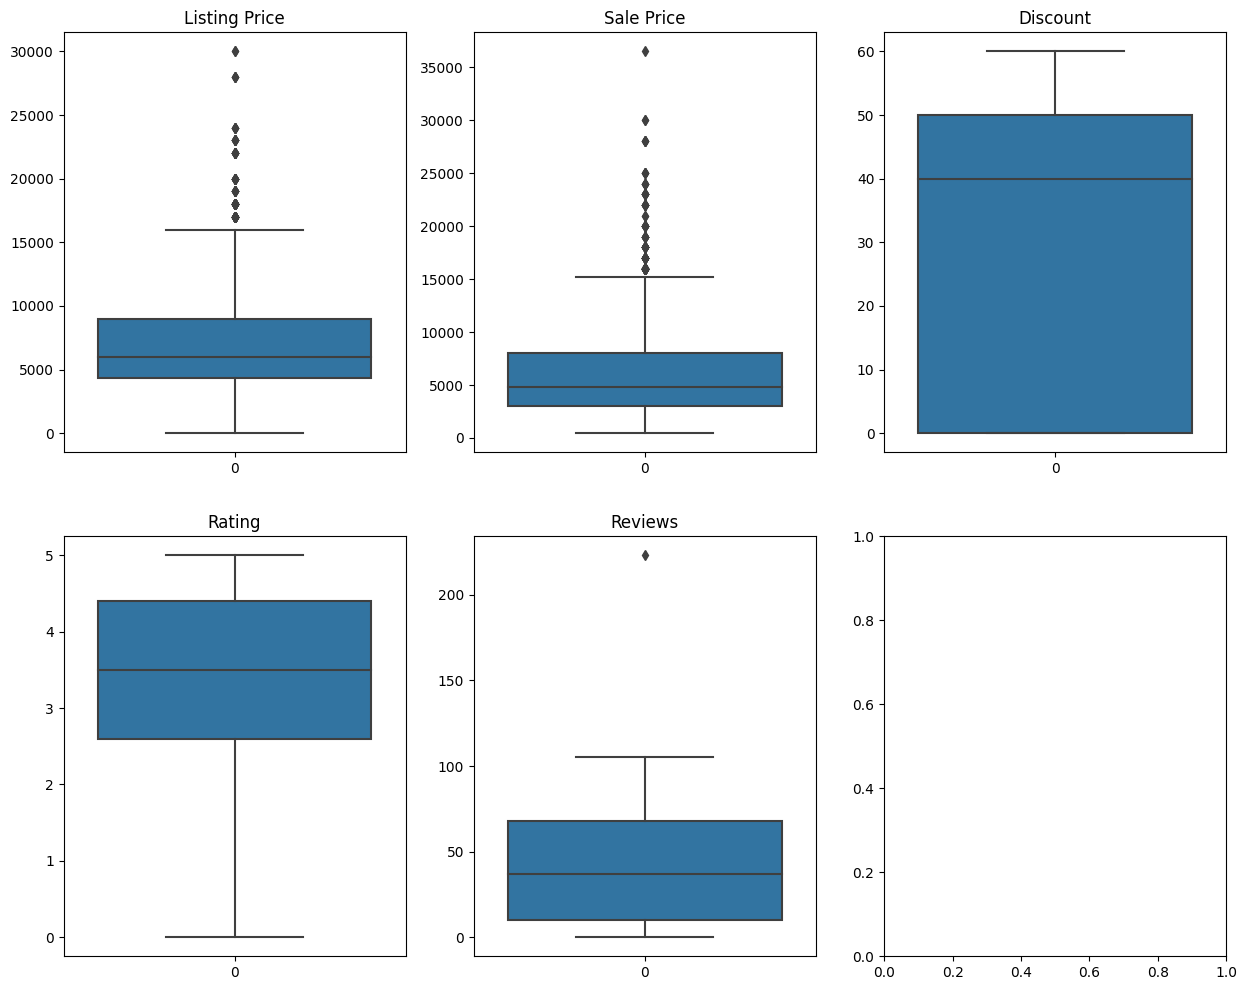

In [11]:
# Persebaran
fig, ax = plt.subplots(2,3, figsize=(15,12))
sns.boxplot(df["Listing Price"],ax=ax[0,0])
ax[0, 0].title.set_text('Listing Price')
sns.boxplot(df["Sale Price"], ax=ax[0,1])
ax[0, 1].title.set_text('Sale Price')
sns.boxplot(df["Discount"], ax=ax[0,2])
ax[0, 2].title.set_text('Discount')
sns.boxplot(df["Rating"], ax=ax[1,0])
ax[1, 0].title.set_text('Rating')
sns.boxplot(df["Reviews"], ax=ax[1,1])
ax[1, 1].title.set_text('Reviews')

plt.show()

Dari detect outlier menggunakan bloxplot diatas didapat
1. Persebaran data Listing Price pada range 500-30000
2. Persebaran data Sale Price pada range 500-35000
3. Persebaran diskon pada range 0-60%
4. Persebaran diskon pada range 0-5
5. Persebaran data Review pada range 0-200

## Data Preprocessing

Dari info data diatas, sudah terlihat bahwa tidak terdapat missing value pada data, sehingga lanngsung ke tahap encode categorical.

### Encode Categorical

In [12]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom umur dan nilai belanja setahun dengan data kategori
cluster_data = pd.concat([encoded_data, df[["Listing Price", "Sale Price","Discount","Reviews"]]], axis=1)

cluster_data.head()

,Brand,Listing Price,Sale Price,Discount,Reviews
0,1,14999,7499,50,41
1,1,7599,3799,50,24
2,0,999,599,40,37
3,0,6999,3499,50,35
4,1,7999,3999,50,72


### Features Selection
Dalam proses ini akan dipilih variabel yang memiliki pengaruh besar dalam penentuan cluster data.

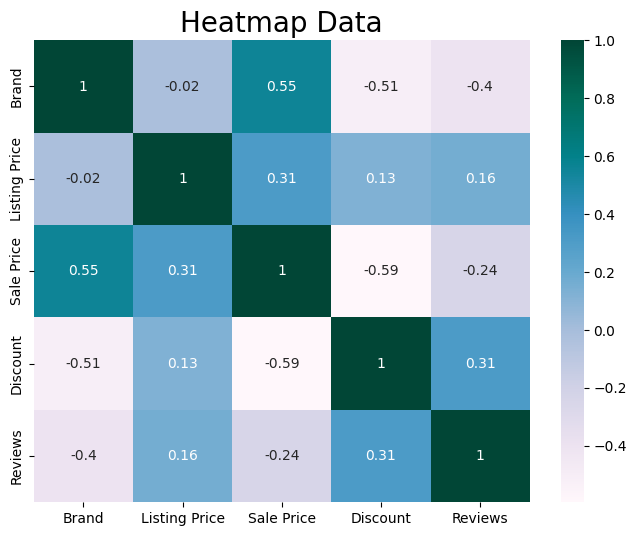

In [13]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'PuBuGn', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Dari hasil heatmap diatas diketahui bahwa korelasi terbesar dimiliki oleh variabel Sale Price dan juga Brand, selanjutnya disusul oleh Listing Price dan Sale Price, serta Diskon dan Reviews, akan tetapi nilainya cukup rendah. Oleh karena itu, untuk selanjutnya akan digunakan 2 variabel dalam menentukan cluster dari data Sale Price, dan Brand.

In [14]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Listing Price", 
                                  "Discount","Reviews"], axis = 1)
cluster_data.head()

,Brand,Sale Price
0,1,7499
1,1,3799
2,0,599
3,0,3499
4,1,3999


### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [15]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["Brand", "Sale Price"]] = scaler.fit_transform(cluster_data[["Brand", "Sale Price"]])
cluster_data.head()

,Brand,Sale Price
0,-0.213301,0.317928
1,-0.213301,-0.544022
2,-1.105835,-1.289493
3,-1.105835,-0.613910
4,-0.213301,-0.497431


## KMeans Cluster

In [16]:
# Memodelkan data dengan cluster yang sudah ditentukan yaitu 2
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [17]:
# Menambahkan kolom baru berupa hasil segmentasi pelanggan
segment = pd.Series(cluster.labels_, name="segment")

In [18]:
# Menggabungkan data awal dengan data hasil segmentasi pelanggan
pd.concat([df, segment], axis=1)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,0
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,0
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,0
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,0
...,...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01\t,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03\t,1
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07\t,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19\t,1


### Menentukan Nilai Optimal K (kelompok)

Akan digunakan metode Elbow untuk menentukan jumlah k optimal.

In [19]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

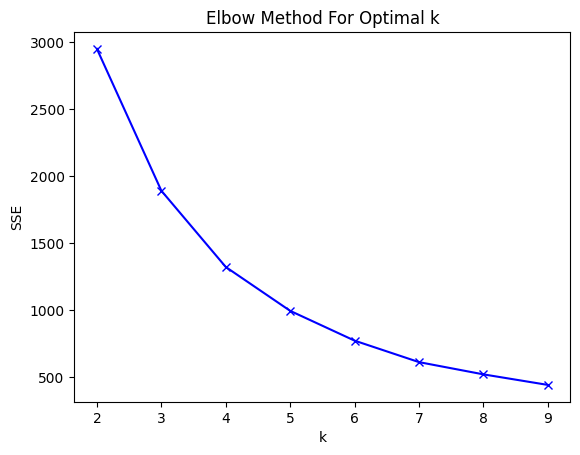

In [20]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan metode elbow pada titik siku-siku diperoleh di k=3 atau k=4, dalam pengaplikasian metode elbow pemilihan k optimal dipilih ketika jarak antara jumlah 1 dan yang lain tidak berbeda secara signifikan. Pada kasus ini nilai k yang optimal adalah 4 dikarenakan jarak antara 2 dan 3 terlalu jauh. Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [21]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.52311466263303


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.5112641897167322


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.5078796959670545


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.5437846749380012


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.5508914827066591


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.5652369631683936


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.5843705754022949


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.5915077266643224


Dari silhouette model didapat k-kluster yang optimum adalah 4, sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=4 yang artinya customer akan dibagi kedalam 4 kelompok.

In [22]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=4)
cluster.fit(cluster_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [24]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([df, segment], axis=1)
results.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,0
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,3
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,3
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,0


In [25]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,0
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,0
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15\t,0
10,Women's adidas Originals Swift Run Shoes,EE4553,7599,4559,40,Adidas ORIGINALS,The Swift distills decades of adidas heritage ...,2.7,36,2020-04-13T15:06:16\t,0


In [26]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
505,Women's adidas Originals ZX Torsion Shoes,EF4375,11999,11999,0,Adidas ORIGINALS,Refuse to blend in. The '80s style of ZX colli...,2.5,17,2020-04-13T15:06:36\t,1
531,Women's adidas Originals ZX Torsion Shoes,EF4374,11999,11999,0,Adidas ORIGINALS,ZX has always stood for innovation. These wome...,4.2,93,2020-04-13T15:06:37\t,1
598,Women's adidas Originals Supercourt RX Shoes,FV3671,13999,13999,0,Adidas ORIGINALS,The Supercourt RX serves up court style with a...,4.9,87,2020-04-13T15:06:39\t,1
600,Women's adidas Originals Supercourt RX Shoes,FV3675,12999,12999,0,Adidas ORIGINALS,The Supercourt RX serves up court style with a...,3.7,2,2020-04-13T15:06:39\t,1
614,Women's adidas Originals NMD_R1 Shoes,FU9352,12999,12999,0,Adidas ORIGINALS,Don't be afraid to shine. These shoes have the...,2.7,80,2020-04-13T15:06:40\t,1


In [27]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
767,Women's adidas by Stella Mccartney PureBoost T...,F36389,14999,7499,50,Adidas SPORT PERFORMANCE,Stella's innovative approach to design steps o...,2.5,14,2020-04-13T15:06:45\t,2
911,Men's adidas Running Solar Glide 19 Shoes,G28062,13999,8399,40,Adidas SPORT PERFORMANCE,Reach your goals in these shoes designed for l...,3.4,62,2020-04-13T15:06:50\t,2
915,Men's adidas Running Solar Glide 19 Shoes,F34099,13999,8399,40,Adidas SPORT PERFORMANCE,Reach your goals in these shoes designed for l...,5.0,20,2020-04-13T15:06:50\t,2
917,Men's adidas Running Solar Boost 19 Shoes,G28058,15999,9599,40,Adidas SPORT PERFORMANCE,There's no such thing as an ordinary run. Thes...,4.8,21,2020-04-13T15:06:51\t,2
921,Men's adidas Running AlphaBoost BF Shoes,EF1164,14999,8999,40,Adidas SPORT PERFORMANCE,Designed for athletes looking to step up their...,2.4,18,2020-04-13T15:06:51\t,2


In [28]:
# Menampilkan 5 data teratas dari cluster 3
results[results["segment"]==3][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,3
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,3
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13T15:06:15\t,3
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,2020-04-13T15:06:15\t,3
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,2020-04-13T15:06:15\t,3


## EDA


<Axes: xlabel='segment', ylabel='Sale Price'>

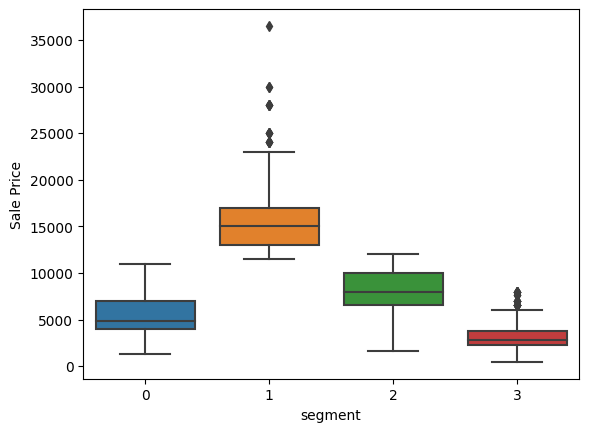

In [29]:
# Pengelompokan customer berdasarkan brand
sns.boxplot(x=results["segment"], y=results["Sale Price"], data=results)

Dari Sale Price diketahui bahwa range harga yang paling murah terdapat pada cluster 3 yaitu >10000. Sedangkan range harga yang paling mahal  terletak pada cluster 2, yaitu sekitar 10000 < harga < 35000. Untuk dua cluster sisanya hampir sama, yaitu lumayan murah dengan range >15000.
<br>
<br>
**Lalu bagaimana dengan persebaran Brand pada tiap cluster?**

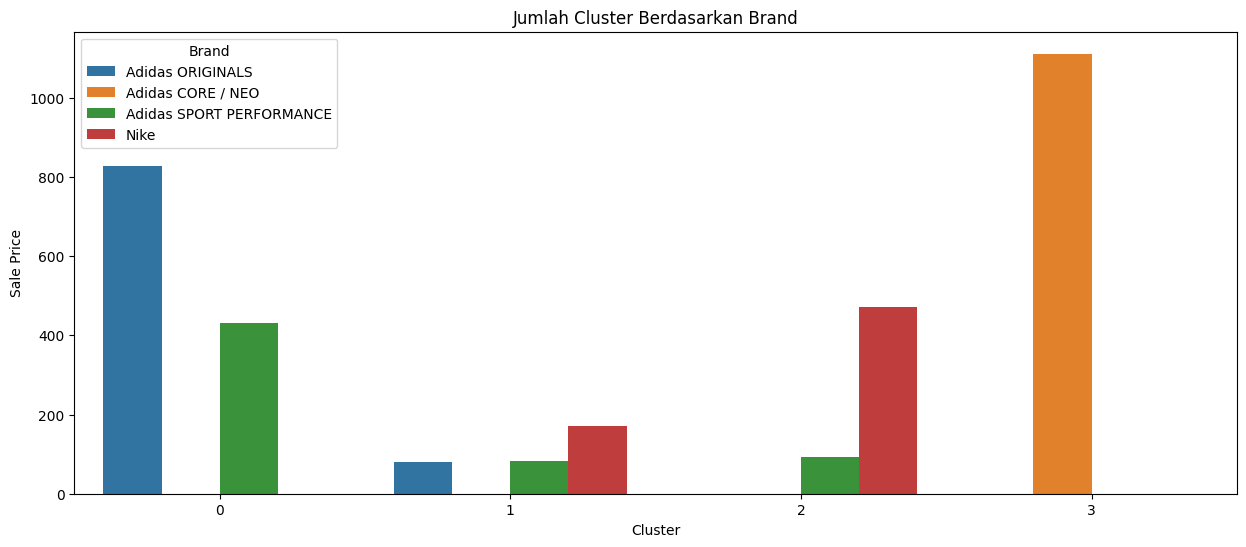

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Brand")
plt.title("Jumlah Cluster Berdasarkan Brand")
plt.xlabel("Cluster")
plt.ylabel("Sale Price")
plt.show()

Ada perbedaan yang cukup mencolok apabila dilihat dari pengaruh Brand. Dari visualisasi diatas diketahui bahwa :
- Cluster 0 : Dengan range harga yang cukup murah >15000, brand yang tercatat dalam culster ini adalah Adidas Original dan Adidas Sport/Performance.
- Cluster 1 : Dengan range harga yang cukup murah >15000, brand yang tercatat pada Cluster ini adalah Adidas Sport/Performance dan Nike.
- Cluster 2 : Dengan range harga yang paling mahal, sekitar 10000 < harga < 35000, brand yang tercatat pada Cluster ini adalah Adidas Original, Adidas Sport/Performance dan Nike .
- Cluster 3 : Dalam Cluster ini, satu-satunya Brand yang mendominasi adalah Adidas CORE/NEO, dengan range harga >10000.

**Lalu bagaimana dengan persebaran Diskon pada tiap cluster?***

<Axes: xlabel='segment', ylabel='Discount'>

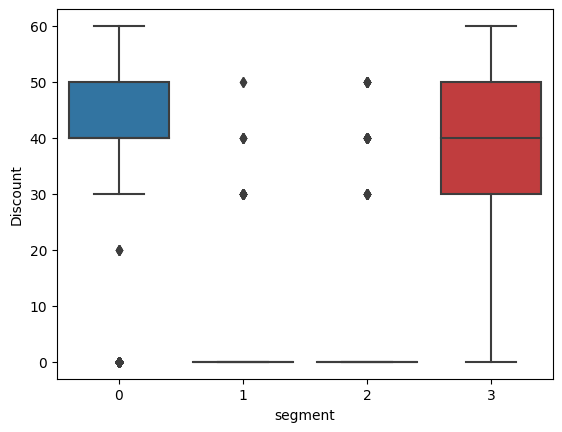

In [31]:
# Persebaran diskon pada tiap cluster
sns.boxplot(x=results["segment"], y=results["Discount"], data=results)

Dari Visualisasi diatas, didapat cluster 0 dan 1 memiliki range diskon antara 0-60. Sedangkan cluster 2 dan 3 memiliki range diskon abtara 0-50

<Axes: xlabel='segment', ylabel='Listing Price'>

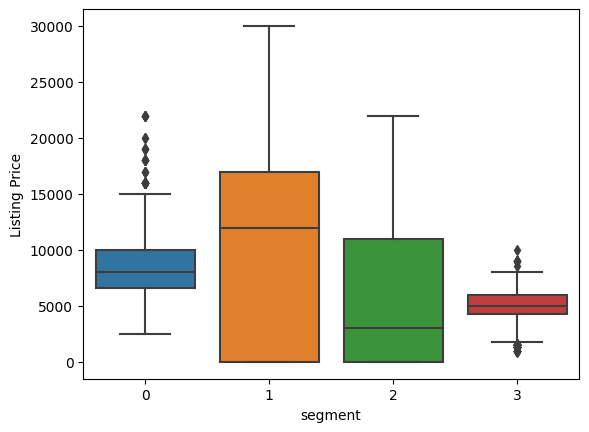

In [32]:
# persebaran listing price pada tiap cluster
sns.boxplot(x=results["segment"], y=results["Listing Price"], data=results)

Pada visualisasi listing price diatas didaapat,
- cluster 0 dan 3 memiliki range listing price > 0 dan < 25000
-cluster 1 memiliki range listing price antara0-10000
-cluster 2 memiliki range listing price antara 0-30000